In [51]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(MAST)
library(readr)
source("/diskmnt/Projects/Users/Evan.p/scripts/Rscript/jupyter_support_functions.R")

# Load objects

In [2]:
setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/snMultiome/rds_objects/cell_types_subset/epithelial')
epithelial_clean = readRDS('57_Integrated_normalized_mCRC_snRNA_noDB_v7_epithelial_clean1.rds')
epithelial_clean

An object of class Seurat 
71822 features across 234738 samples within 2 assays 
Active assay: SCT (35221 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 7 dimensional reductions calculated: pca, umap.rna, integrated.scvi, mCRCv4_umap.scvi, mCRCv5_umap.scvi, mCRCv6_umap.scvi, epithelial_umap.scvi

In [3]:
setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/snMultiome/rds_objects/cell_types_subset/epithelial')
epithelial_reint = readRDS('57_Integrated_normalized_mCRC_snRNA_noDB_v7_epithelial_clean1_reINT.rds')
epithelial_reint

An object of class Seurat 
71822 features across 234738 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: SCT
 7 dimensional reductions calculated: pca, umap.rna, integrated.scvi, mCRCv4_umap.scvi, mCRCv5_umap.scvi, mCRCv6_umap.scvi, epithelial_umap.scvi

# Variant mapping

In [58]:
mutation_mapping_path <- "/diskmnt/Projects/MetNet_analysis_2/Colorectal/epeng/10Xmapping/metadata_mapped_mutations.tsv"
mutation_mapping <- as.data.frame(read_tsv(mutation_mapping_path, col_names = TRUE))
rownames(mutation_mapping) <- mutation_mapping[[1]]
mutation_mapping <- mutation_mapping %>% select(APC_ref, APC_var, APC_mut, KRAS_ref, KRAS_var, KRAS_mut, TP53_mut, TP53_var, TP53_mut)
head(mutation_mapping)

New names:
• `` -> `...1`
Rows: 130122 Columns: 3171
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (12): ...1, orig.ident, cell_type_RNA, cell_type_RNA_simple, DF_double...
dbl (3157): nCount_RNA, nFeature_RNA, percent.mito, nCount_SCT, nFeature_SCT...
lgl    (2): scrublet_doublet, scrublet_na

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


APC_ref APC_var APC_mut KRAS_ref KRAS_var
CM268C1-S1_AAACAGCCAAGCTTAT-1 0       0       0       0        0       
CM268C1-S1_AAACAGCCATTAAGTC-1 0       0       0       0        0       
CM268C1-S1_AAACATGCATTGCGGT-1 0       0       0       0        0       
CM268C1-S1_AAACCGAAGCCTAATA-1 0       0       0       0        0       
CM268C1-S1_AAACCGAAGGTCCTAG-1 0       0       0       0        0       
CM268C1-S1_AAACCGAAGTAGGATG-1 0       0       0       0        0       
                              KRAS_mut TP53_mut TP53_var
CM268C1-S1_AAACAGCCAAGCTTAT-1 0        0        0       
CM268C1-S1_AAACAGCCATTAAGTC-1 0        0        0       
CM268C1-S1_AAACATGCATTGCGGT-1 0        0        0       
CM268C1-S1_AAACCGAAGCCTAATA-1 0        0        0       
CM268C1-S1_AAACCGAAGGTCCTAG-1 0        0        0       
CM268C1-S1_AAACCGAAGTAGGATG-1 0        0        0

In [62]:
type(mutation_mapping$APC_mut)

[1] "double"

In [88]:
wxs_epithelial <- subset(epithelial_reint, 
                         subset = (orig.ident == 'CM268C1-S1' | orig.ident == 'CM268C1-T1' | orig.ident == 'CM354C1-T1' |
                                   orig.ident == 'CM354C2-T1' | orig.ident == 'CM268C1-T1' | orig.ident == 'CM392C1-S1' |
                                   orig.ident == 'CM392C2-Th1' | orig.ident == 'CM426C1-Th1' | orig.ident == 'CM426C2-Tp1' |
                                   orig.ident == 'CM478C1-T1Y2' | orig.ident == 'HT213C1-Te1' | orig.ident == 'HT225C1-Th1' |
                                   orig.ident == 'HT230C1-Th1' | orig.ident == 'HT253C1-Th1' | orig.ident == 'HT260C1-Th1' |
                                   orig.ident == 'HT266C1-Tb1'))

In [89]:
mutation_mapping_toadd <- mutation_mapping %>% select(APC_mut, KRAS_mut, TP53_mut)
wxs_epithelial <- AddMetaData(wxs_epithelial, metadata = mutation_mapping_toadd)                                  

png 
  2

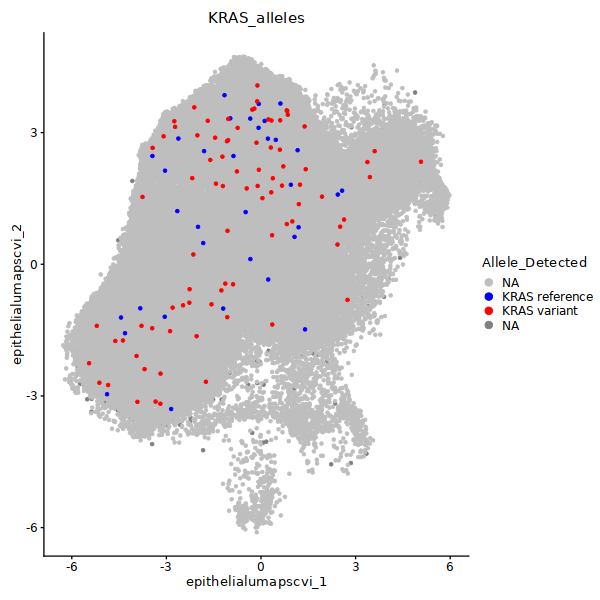

In [92]:
p <- DimPlot(wxs_epithelial, group.by = "KRAS_mut", reduction = "epithelial_umap.scvi", order = T, label=F, pt.size=1, label.size=6, raster=FALSE) +
    labs(title = "KRAS_alleles", color="Allele_Detected") + 
    scale_color_manual(labels = c("NA", "KRAS reference", "KRAS variant"), values = c("grey", "blue", "red"))
pdf('KRAS_alleles_umap.pdf', height = 6, width = 6)
p
dev.off()

set_size(6,6)
p

png 
  2

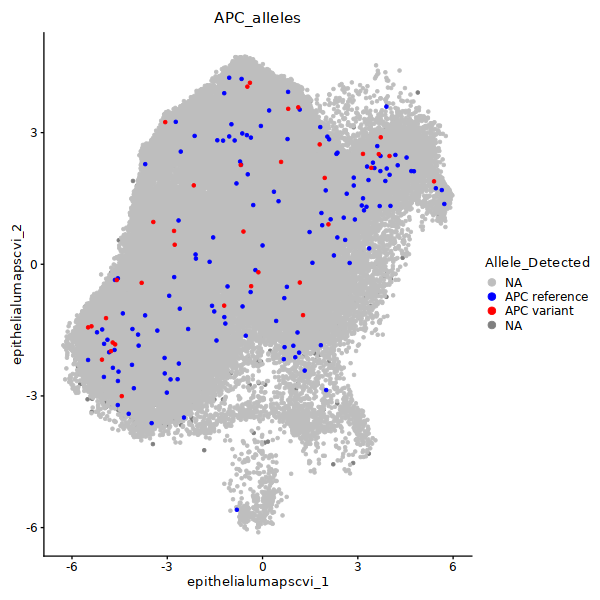

In [93]:
p <- DimPlot(wxs_epithelial, group.by = "APC_mut", reduction = "epithelial_umap.scvi", order = T, label=F, pt.size=1, label.size=6, raster=FALSE) +
    labs(title = "APC_alleles", color="Allele_Detected") + 
    scale_color_manual(labels = c("NA", "APC reference", "APC variant"), values = c("grey", "blue", "red"))
pdf('APC_alleles_umap.pdf', height = 6, width = 6)
p
dev.off()

set_size(6,6)
p

In [95]:
unique(wxs_epithelial$TP53_mut)

[1]  0 NA  2

png 
  2

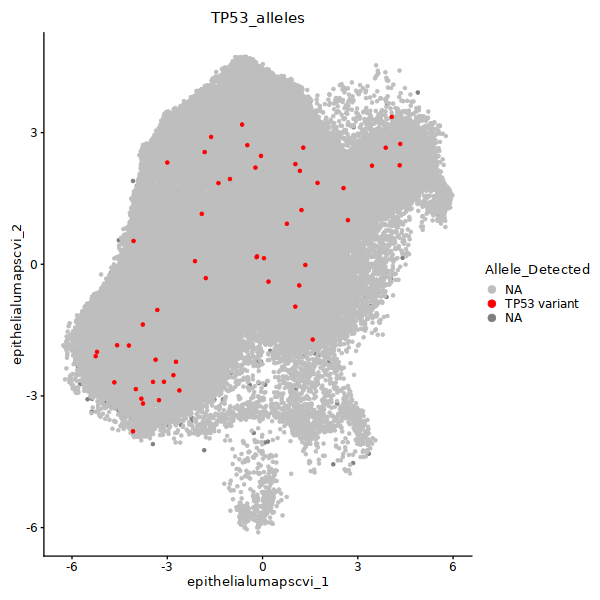

In [96]:
p <- DimPlot(wxs_epithelial, group.by = "TP53_mut", reduction = "epithelial_umap.scvi", order = T, label=F, pt.size=1, label.size=6, raster=FALSE) +
    labs(title = "TP53_alleles", color="Allele_Detected") + 
    scale_color_manual(labels = c("NA", "TP53 variant"), values = c("grey", "red"))
pdf('TP53_alleles_umap.pdf', height = 6, width = 6)
p
dev.off()

set_size(6,6)
p

# Cell Type Annotation

 ### Nature volume 619, pages572–584 (2023)
- BEST4+ enterocytes (BEST4, OTOP2), 
- goblet cells (MUC2, TFF1, SYTL2), 
- immature goblet cells (KLK1, RETNLB, CLCA1), 
- stem cells (RGMB, SMOC2, LGR5, ASCL2), 
- tuft cells (SH2D6, TRPM5, BMX, LRMP, HCK), 
- enteroendocrine cells (SCGN, FEV, CHGA, PYY, GCG), 
- cycling transit-amplifying cells (TICRR, CDC25C),
- Paneth cells (LYZ, DEFA5)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



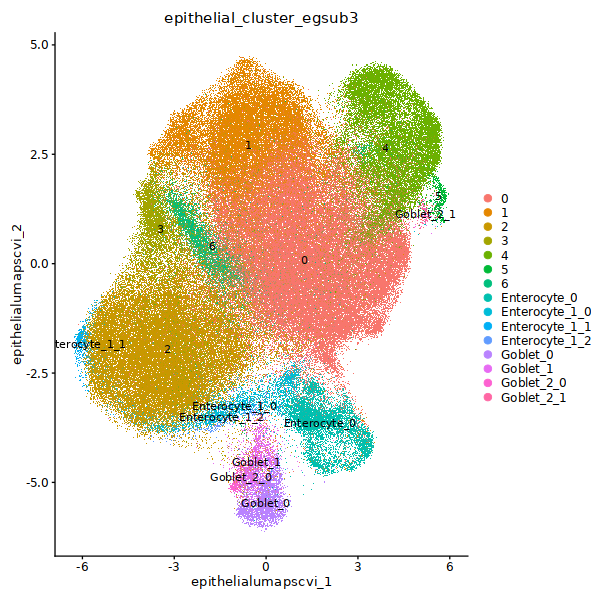

In [32]:
set_size(6,6)
p1 = DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_egsub3', label = TRUE)
p1

## BEST4+ enterocytes (BEST4, OTOP2)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



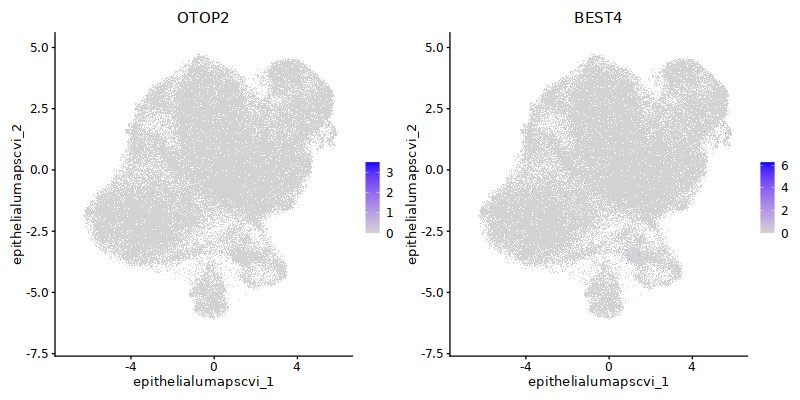

In [14]:
set_size(8,4)
FeaturePlot(epithelial_reint, features = c('OTOP2', 'BEST4'), reduction = 'epithelial_umap.scvi')

## goblet cells (MUC2, TFF1, SYTL2)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



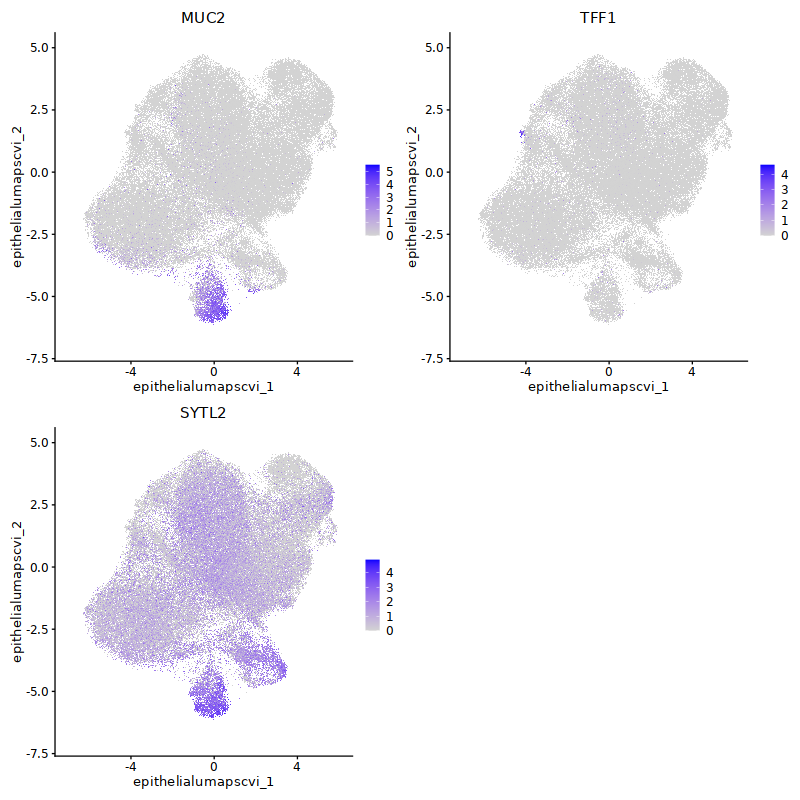

In [18]:
set_size(8,8)
FeaturePlot(epithelial_reint, features = c('MUC2', 'TFF1', 'SYTL2'), reduction = 'epithelial_umap.scvi')

## immature goblet cells (KLK1, RETNLB, CLCA1)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



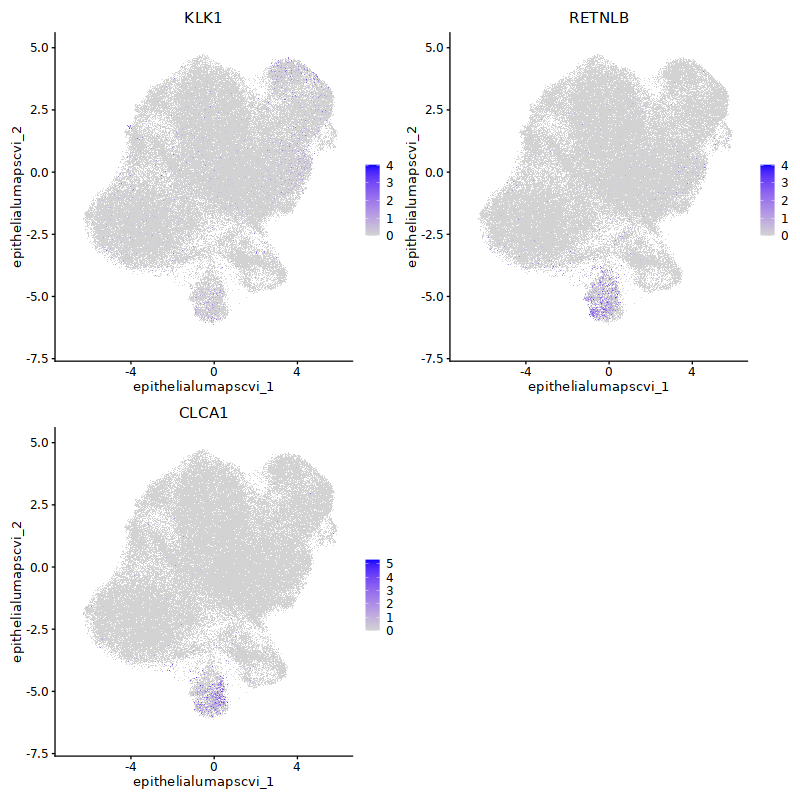

In [19]:
set_size(8,8)
FeaturePlot(epithelial_reint, features = c('KLK1', 'RETNLB', 'CLCA1'), reduction = 'epithelial_umap.scvi')

## stem cells (RGMB, SMOC2, LGR5, ASCL2)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



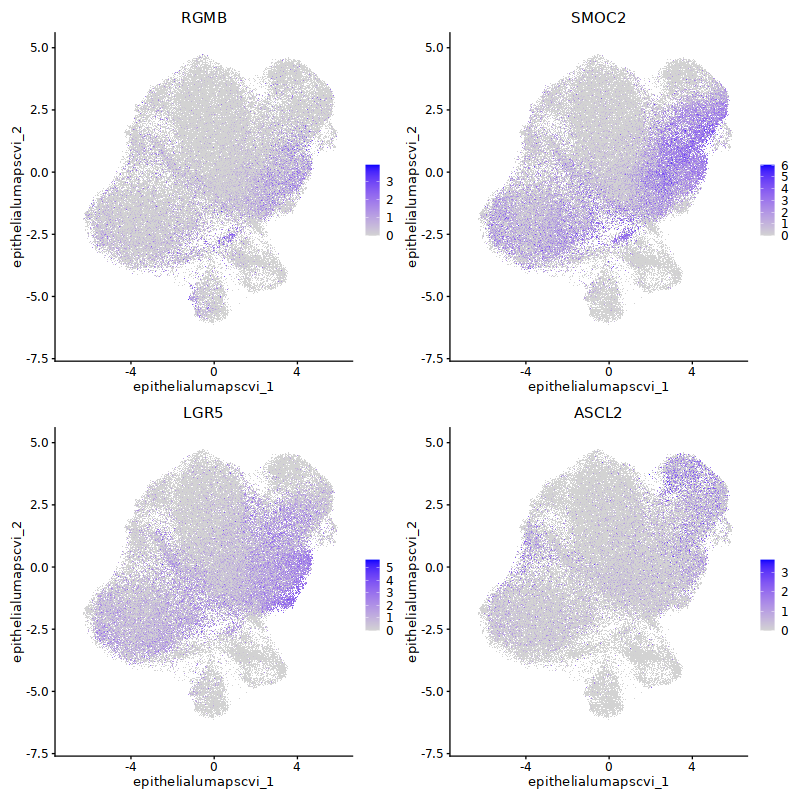

In [22]:
set_size(8,8)
FeaturePlot(epithelial_reint, features = c('RGMB', 'SMOC2', 'LGR5', 'ASCL2'), reduction = 'epithelial_umap.scvi')

## tuft cells (SH2D6, TRPM5, BMX, LRMP, HCK)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



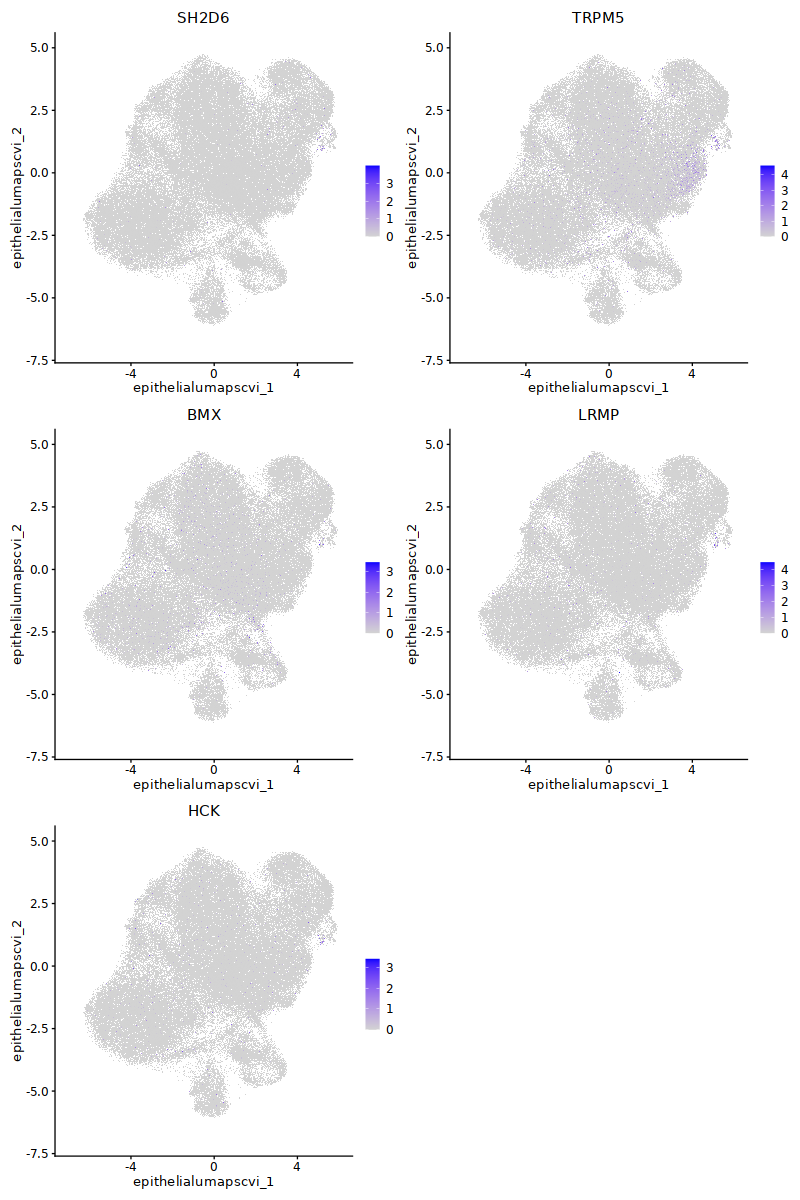

In [27]:
set_size(8,12)
FeaturePlot(epithelial_reint, features = c('SH2D6', 'TRPM5', 'BMX', 'LRMP', 'HCK'), reduction = 'epithelial_umap.scvi')

## enteroendocrine cells (SCGN, FEV, CHGA, PYY, GCG)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



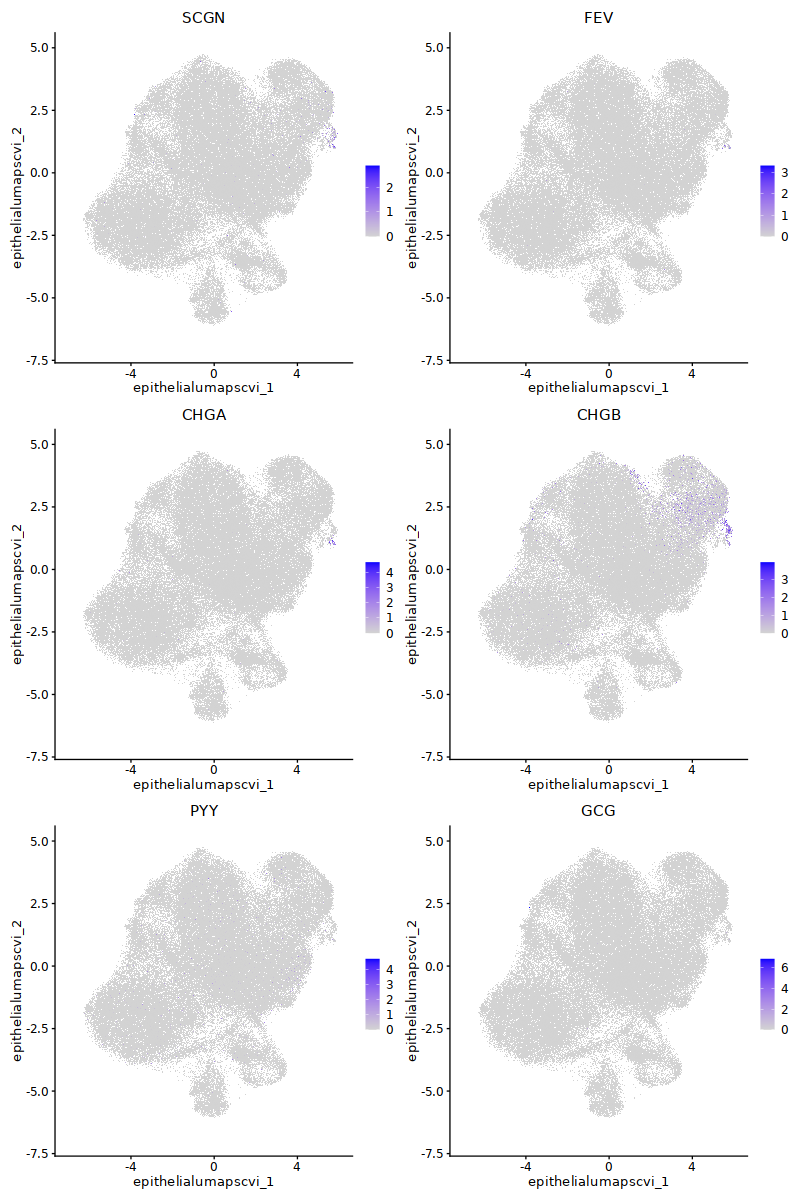

In [29]:
set_size(8,12)
FeaturePlot(epithelial_reint, features = c('SCGN', 'FEV', 'CHGA', 'CHGB', 'PYY', 'GCG'), reduction = 'epithelial_umap.scvi')

## cycling transit-amplifying cells (TICRR, CDC25C)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



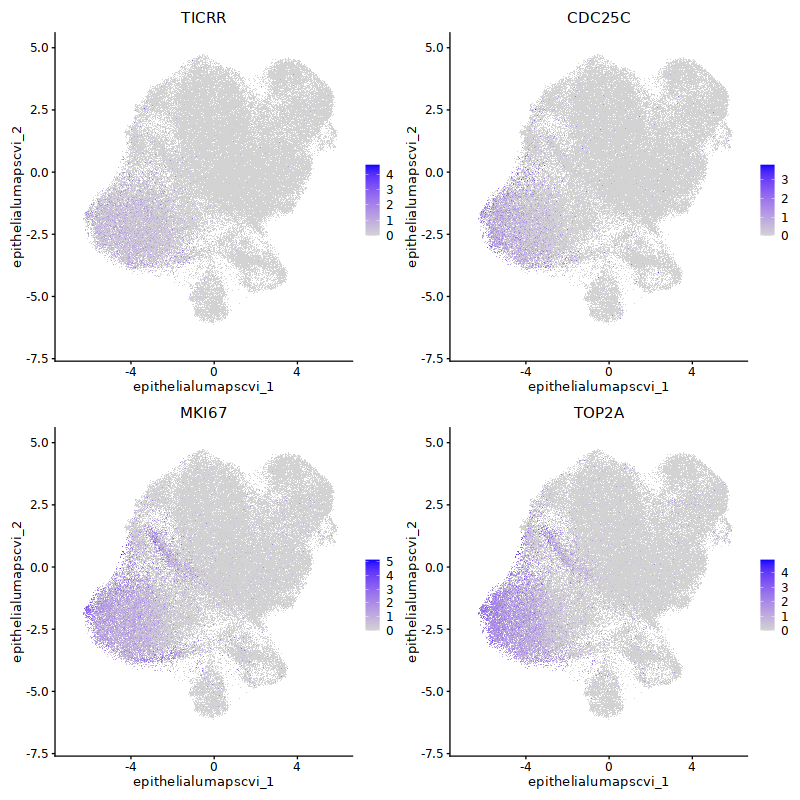

In [36]:
set_size(8,8)
FeaturePlot(epithelial_reint, features = c('TICRR', 'CDC25C', 'MKI67', 'TOP2A'), reduction = 'epithelial_umap.scvi')

## Paneth cells (LYZ, DEFA5)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



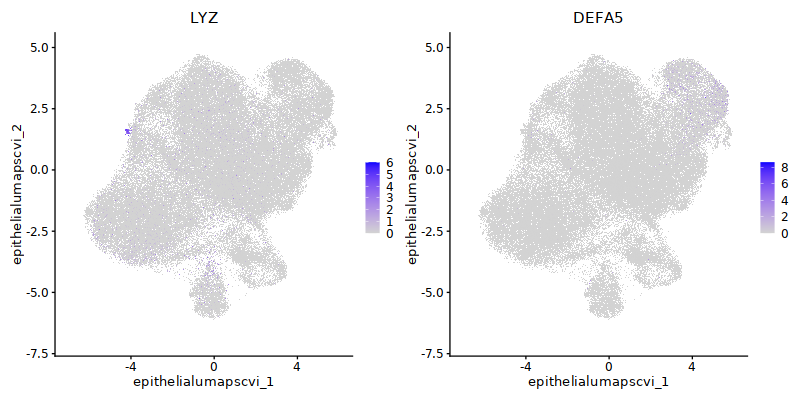

In [31]:
set_size(8,4)
FeaturePlot(epithelial_reint, features = c('LYZ', 'DEFA5'), reduction = 'epithelial_umap.scvi')

## angeiogenic cells

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



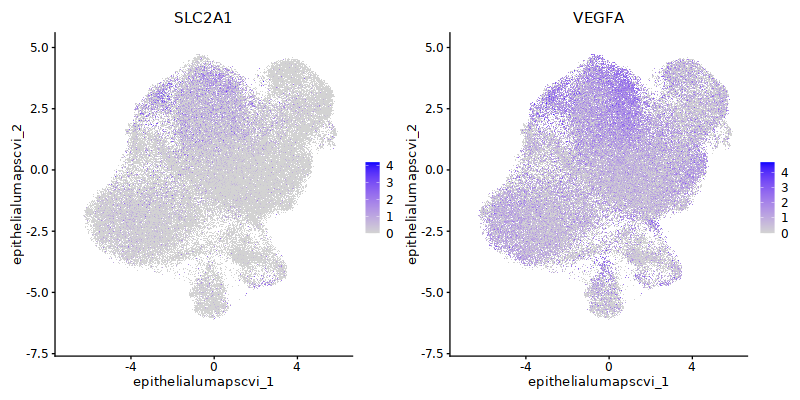

In [21]:
set_size(8,4)
FeaturePlot(epithelial_reint, features = c('SLC2A1', 'VEGFA'), reduction = 'epithelial_umap.scvi')

## clustering

### map old annotation, new 0.1 res cluster, organ, and tissue types

In [100]:
epithelial_reint <- FindClusters(epithelial_reint, 
                                 resolution = 0.1, 
                                 cluster.name = 'epithelial_clusters_0.1', 
                                 graph = 'RNA_snn')

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 234738
Number of edges: 3324731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9431
Number of communities: 591
Elapsed time: 59 seconds


575 singletons identified. 16 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



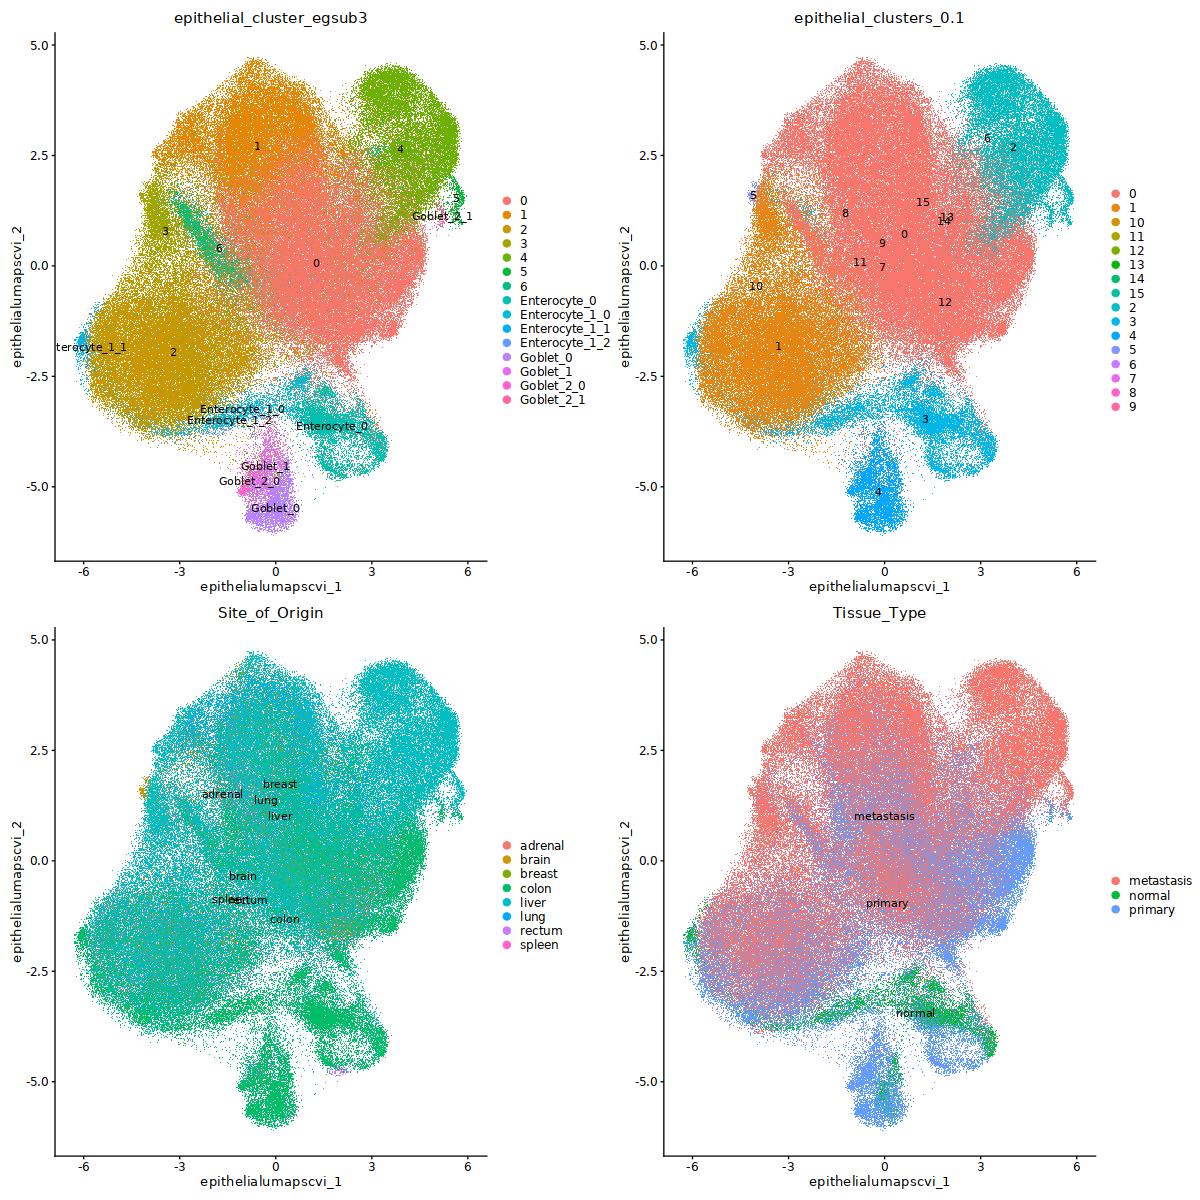

In [101]:
set_size(12,12)
p2 = DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_clusters_0.1', label = TRUE)
p3 = DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'Site_of_Origin', label = TRUE)
p4 = DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'Tissue_Type', label = TRUE)
p1 + p2  + p3 + p4

### map orig.ident

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



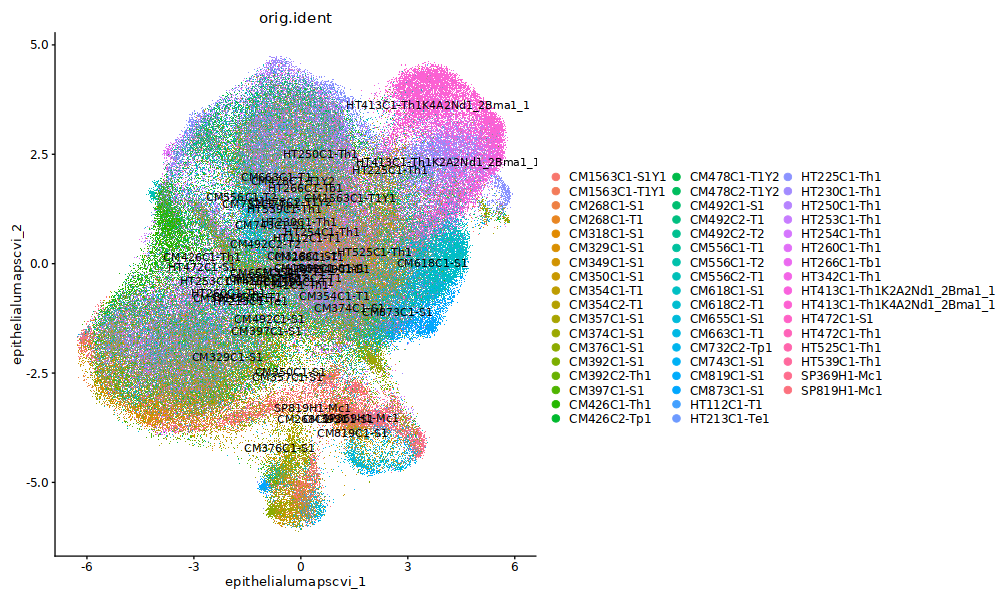

In [38]:
set_size(10,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'orig.ident', label = TRUE)

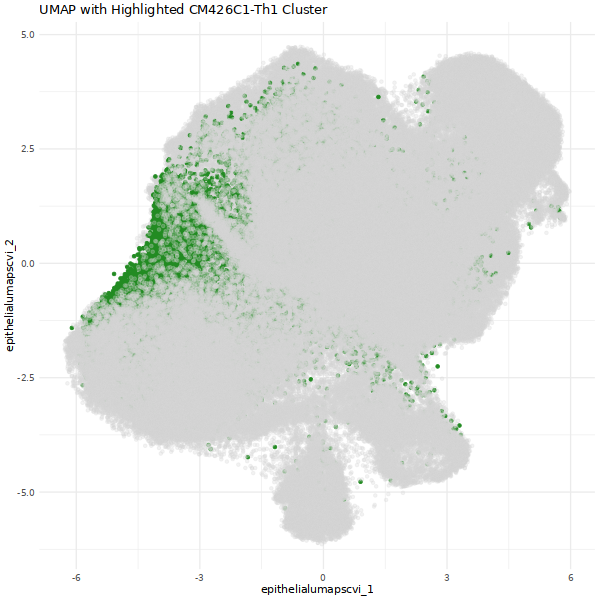

In [165]:
set_size(6,6)
Highlight_Cluster_UMAP(seurat_object = epithelial_reint,
                       metadata_column = 'orig.ident',
                       cell_type = 'CM426C1-Th1',
                       umap_reduction = 'epithelial_umap.scvi',
                       highlight_color = 'forestgreen'
                      )

### DEG

In [42]:
Idents(epithelial_reint) = "epithelial_cluster_egsub3"
cluster6_markers = FindMarkers(epithelial_reint,
                               ident.1 = '6',
                               ident.2 = '2',
                               min.pct=0.1, 
                               logfc.threshold=0.5, 
                               only.pos = TRUE, 
                               return.thresh = 0.01,
                               test.use = 'MAST')

Warning message in new_with_repaired_slots(classname = method, design = colData(sca), :
“Dropping illegal slot(s) return.thresh for class BayesGLMlike.  
                    This likely indicates a bug in an upstream package.”

 Completed [--------------------------------------------]   0% with 0 failures

 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-------------------------------------

In [44]:
write.csv(cluster6_markers,  "mCRC_epithelial_cluster6_2_mast_deg.csv", row.names = TRUE)

### reclustering and subset

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



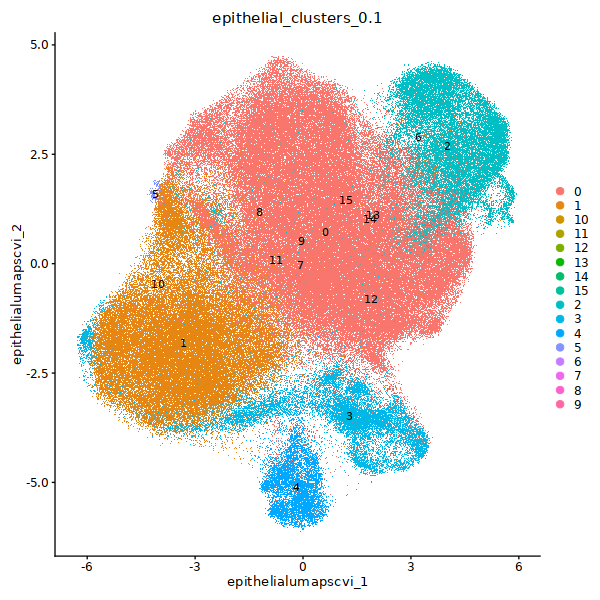

In [122]:
set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_clusters_0.1', label = TRUE)

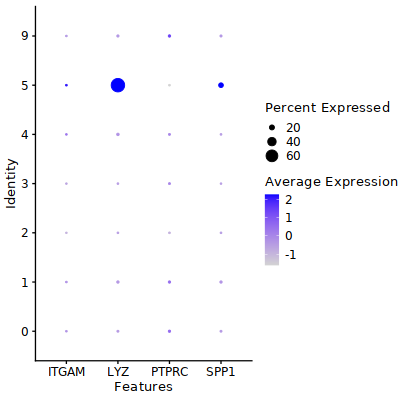

In [118]:
set_size(4,4)
DefaultAssay(epithelial_clean2) <- 'RNA' 
DotPlot(epithelial_clean2, feature = c('ITGAM', 'LYZ', 'PTPRC', 'SPP1'), group.by='epithelial_clusters_0.1')

In [124]:
# cluster 5: a doublet cluster of microglia

In [123]:
table(epithelial_reint$epithelial_clusters_0.1)


     0      1     10     11     12     13     14     15      2      3      4 
126874  58895      2      2      2      2      2      2  26127  14564   7519 
     5      6      7      8      9 
   164      2      2      2    577 

In [127]:
epithelial_clean2 <- epithelial_reint %>% subset(epithelial_clusters_0.1 == '0' |
                                                 epithelial_clusters_0.1 == '1' |
                                                 epithelial_clusters_0.1 == '2' |
                                                 epithelial_clusters_0.1 == '3' |
                                                 epithelial_clusters_0.1 == '4' |
                                                 epithelial_clusters_0.1 == '9' 
                                                 )

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 234556
Number of edges: 3318360

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9434
Number of communities: 582
Elapsed time: 58 seconds


575 singletons identified. 7 final clusters.

Warning message:
“Adding a command log without an assay associated with it”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



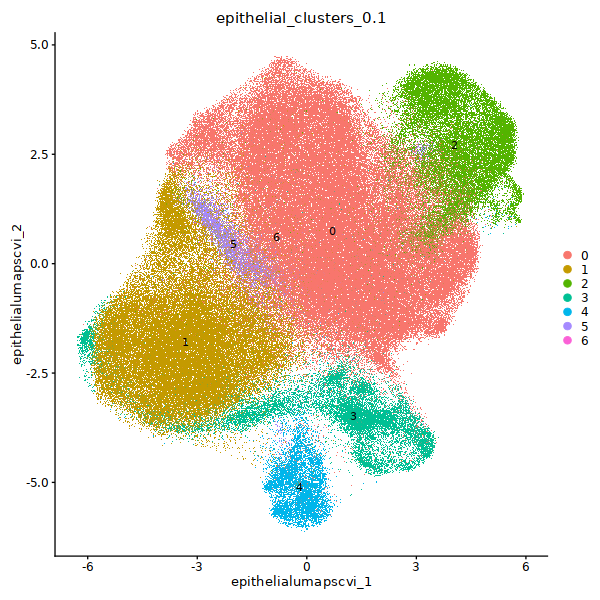

In [128]:
epithelial_clean2 <- FindClusters(epithelial_clean2, 
                                  resolution = 0.1, 
                                  cluster.name = 'epithelial_clusters_0.1', 
                                  graph = 'RNA_snn')

set_size(6,6)
DimPlot(epithelial_clean2, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_clusters_0.1', label = TRUE)

In [131]:
table(epithelial_clean2$epithelial_clusters_0.1)


     0      1      2      3      4      5      6 
122487  59314  25721  14574   7544   4914      2 

In [132]:
epithelial_clean2 <- epithelial_clean2 %>% subset(epithelial_clusters_0.1 == '0' |
                                                  epithelial_clusters_0.1 == '1' |
                                                  epithelial_clusters_0.1 == '2' |
                                                  epithelial_clusters_0.1 == '3' |
                                                  epithelial_clusters_0.1 == '4' |
                                                  epithelial_clusters_0.1 == '5' )

### cluster subset

In [141]:
DefaultAssay(epithelial_clean2) <- 'SCT'

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



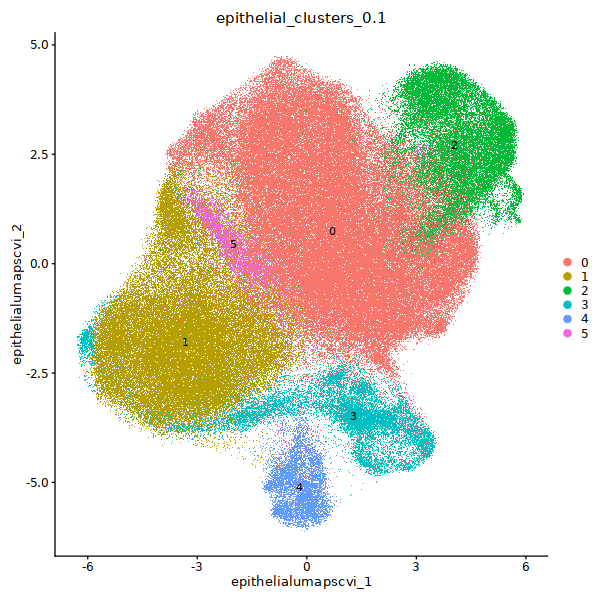

In [134]:
set_size(6,6)
DimPlot(epithelial_clean2, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_clusters_0.1', label = TRUE)

#### cluster 3 subclustering

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14574
Number of edges: 388325

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9338
Number of communities: 2
Elapsed time: 1 seconds


[1] "0"   "1"   "5"   "3_0" "2"   "3_1" "4"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



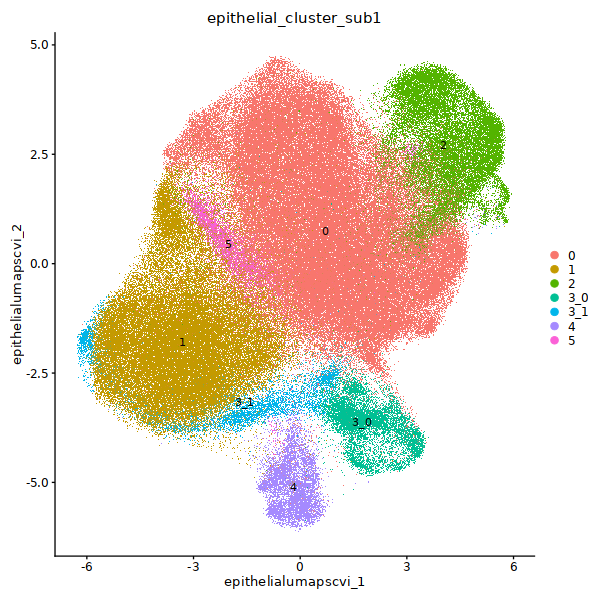

In [137]:
Idents(epithelial_clean2) = "epithelial_clusters_0.1"
epithelial_clean2 = FindSubCluster(object = epithelial_clean2,
                                   cluster = '3',
                                   graph.name = 'RNA_snn',
                                   subcluster.name = "epithelial_cluster_sub1",
                                   resolution = 0.1,
                                   algorithm = 1
                                  )
unique(epithelial_clean2$epithelial_cluster_sub1)

set_size(6,6)
DimPlot(epithelial_clean2, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub1', label = TRUE)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5375
Number of edges: 139053

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8614
Number of communities: 5
Elapsed time: 0 seconds


[1] "0"     "1"     "5"     "3_0"   "2"     "3_1_2" "3_1_3" "4"     "3_1_0"
[10] "3_1_4" "3_1_1"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



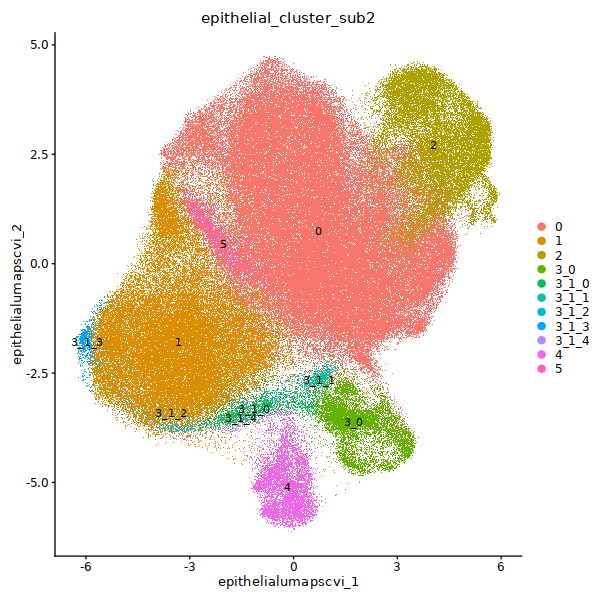

In [143]:
Idents(epithelial_clean2) = "epithelial_cluster_sub1"
epithelial_clean2 = FindSubCluster(object = epithelial_clean2,
                                   cluster = '3_1',
                                   graph.name = 'RNA_snn',
                                   subcluster.name = "epithelial_cluster_sub2",
                                   resolution = 0.3,
                                   algorithm = 1
                                  )
unique(epithelial_clean2$epithelial_cluster_sub2)

set_size(6,6)
DimPlot(epithelial_clean2, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub2', label = TRUE)

In [145]:
epithelial_clean2@meta.data <- epithelial_clean2@meta.data %>% 
                               mutate(epithelial_cluster_sub2 = case_when(epithelial_cluster_sub2 == '3_1_0' ~ '3_1',
                                                                          epithelial_cluster_sub2 == '3_1_2' ~ '3_1',
                                                                          epithelial_cluster_sub2 == '3_1_4' ~ '3_1',
                                                                          TRUE ~ epithelial_cluster_sub2))

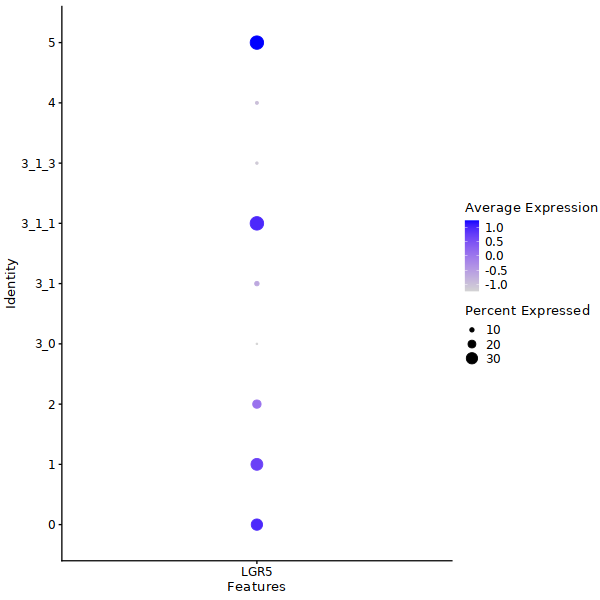

In [146]:
DotPlot(epithelial_clean2, feature = 'LGR5', group.by = 'epithelial_cluster_sub2')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



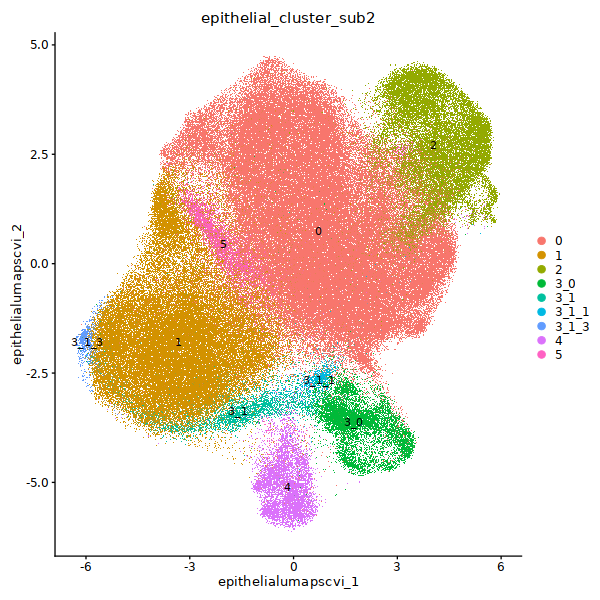

In [147]:
set_size(6,6)
DimPlot(epithelial_clean2, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub2', label = TRUE)

#### cluster 0 subclustering

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 122487
Number of edges: 1365004

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9115
Number of communities: 577
Elapsed time: 15 seconds


575 singletons identified. 2 final clusters.



[1] "0_0"   "1"     "0_1"   "5"     "3_0"   "2"     "3_1"   "3_1_3" "4"    
[10] "3_1_1"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



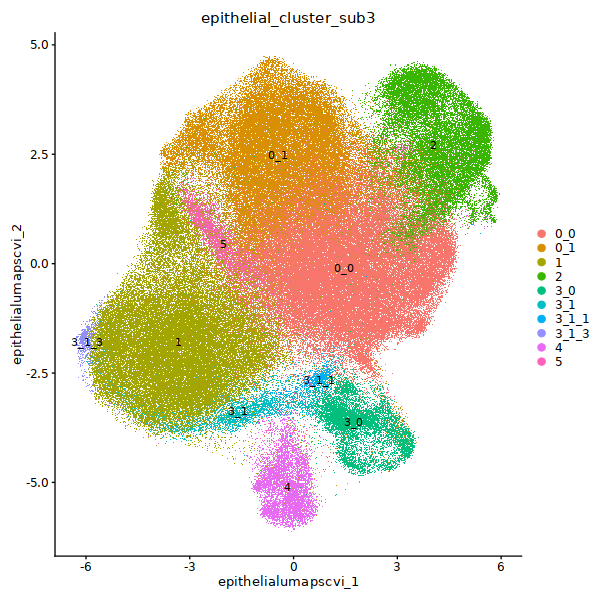

In [156]:
Idents(epithelial_clean2) = "epithelial_cluster_sub2"
epithelial_clean2 = FindSubCluster(object = epithelial_clean2,
                                   cluster = '0',
                                   graph.name = 'RNA_snn',
                                   subcluster.name = "epithelial_cluster_sub3",
                                   resolution = 0.1,
                                   algorithm = 1
                                  )
unique(epithelial_clean2$epithelial_cluster_sub3)

set_size(6,6)
DimPlot(epithelial_clean2, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub3', label = TRUE)

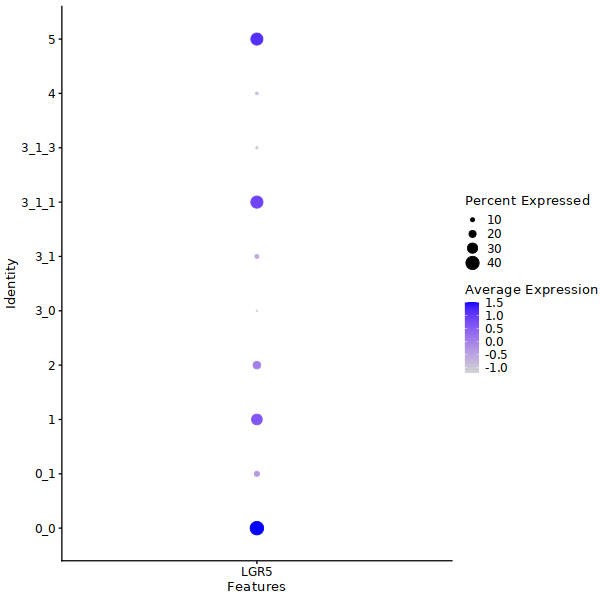

In [152]:
DotPlot(epithelial_clean2, feature = 'LGR5', group.by = 'epithelial_cluster_sub3')

#### cluster 1 subclustering

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 59314
Number of edges: 757630

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9149
Number of communities: 4
Elapsed time: 8 seconds


[1] "0_0"   "1_0"   "1_1"   "0_1"   "5"     "3_0"   "2"     "3_1"   "3_1_3"
[10] "4"     "1_2"   "3_1_1" "1_3"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



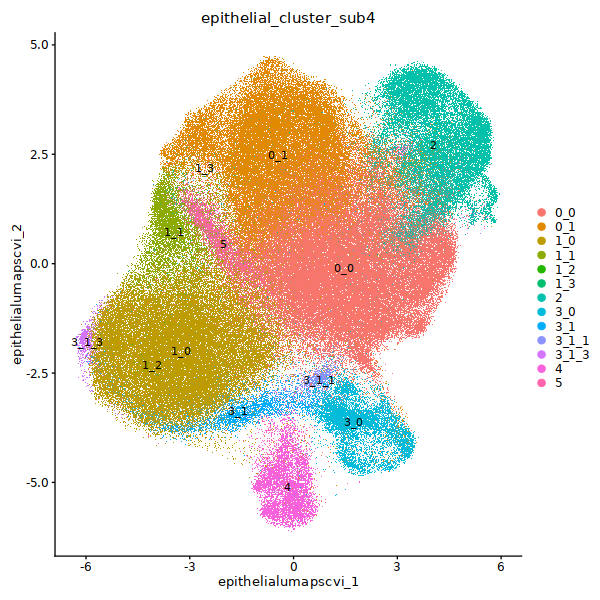

In [157]:
Idents(epithelial_clean2) = "epithelial_cluster_sub3"
epithelial_clean2 = FindSubCluster(object = epithelial_clean2,
                                   cluster = '1',
                                   graph.name = 'RNA_snn',
                                   subcluster.name = "epithelial_cluster_sub4",
                                   resolution = 0.1,
                                   algorithm = 1
                                  )
unique(epithelial_clean2$epithelial_cluster_sub4)

set_size(6,6)
DimPlot(epithelial_clean2, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub4', label = TRUE)

In [158]:
table(epithelial_clean2$epithelial_cluster_sub4)


  0_0   0_1   1_0   1_1   1_2   1_3     2   3_0   3_1 3_1_1 3_1_3     4     5 
73797 48690 50322  8849   141     2 25721  9199  3590   936   849  7544  4914 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



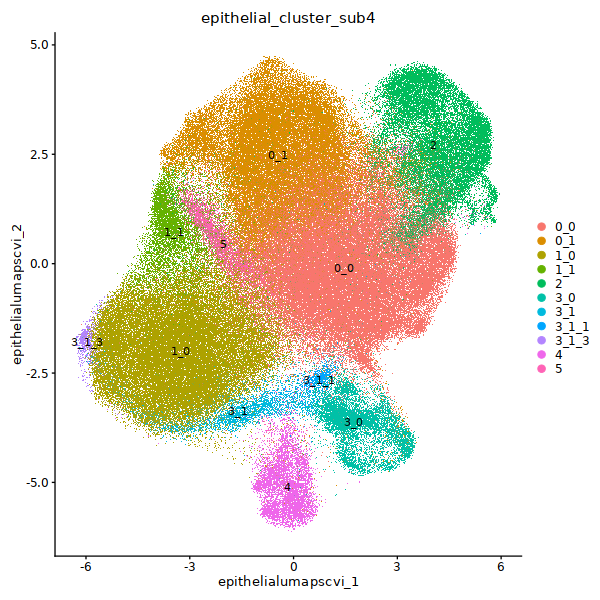

In [160]:
epithelial_clean2 <- epithelial_clean2 %>% subset(epithelial_cluster_sub4 != '1_3')

epithelial_clean2@meta.data <- epithelial_clean2@meta.data %>% 
                               mutate(epithelial_cluster_sub4 = case_when(epithelial_cluster_sub4 == '1_2' ~ '1_0',
                                                                          TRUE ~ epithelial_cluster_sub4))

set_size(6,6)
DimPlot(epithelial_clean2, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub4', label = TRUE)

In [161]:
Idents(epithelial_clean2) = "epithelial_cluster_sub4"
cluster_1_1_markers = FindMarkers(epithelial_clean2,
                                  ident.1 = '1_1',
                                  ident.2 = '1_0',
                                  min.pct=0.1, 
                                  logfc.threshold=0.5, 
                                  only.pos = TRUE, 
                                  return.thresh = 0.01,
                                  test.use = 'MAST')
write.csv(cluster_1_1_markers,  "mCRC_epithelial_cluster_1_1_mast_deg.csv", row.names = TRUE)

Warning message in new_with_repaired_slots(classname = method, design = colData(sca), :
“Dropping illegal slot(s) norm.method, return.thresh for class BayesGLMlike.  
                    This likely indicates a bug in an upstream package.”

 Completed [--------------------------------------------]   0% with 0 failures

 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>------------------------

#### remove cluster 1_1 (Necrotic tumor cells)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:08:45 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:08:45 Read 225703 rows and found 30 numeric columns

14:08:45 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:08:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:09:09 Writing NN index file to

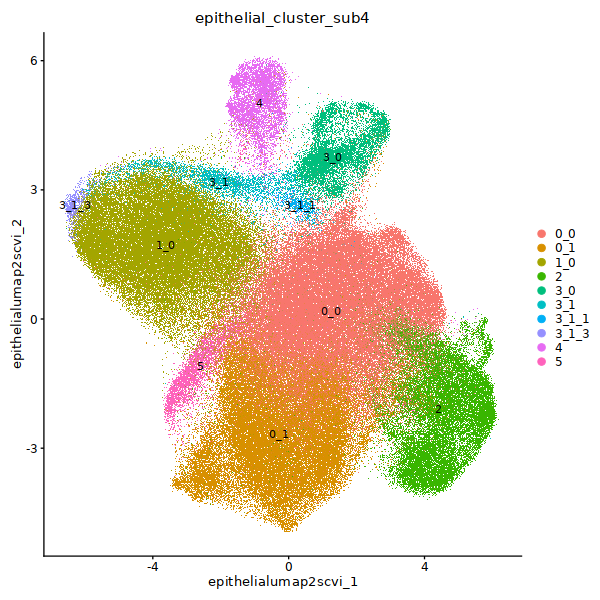

In [167]:
epithelial_clean3 <- epithelial_clean2 %>% 
                     subset(epithelial_cluster_sub4 != '1_1') %>% 
                     RunUMAP(reduction = "integrated.scvi", 
                             dims = 1:30, 
                             reduction.name = "epithelial_umap2.scvi")

set_size(6,6)
DimPlot(epithelial_clean3, reduction = 'epithelial_umap2.scvi', group.by = 'epithelial_cluster_sub4', label = TRUE)

#### cluster 2 subclustering

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25721
Number of edges: 405566

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8880
Number of communities: 5
Elapsed time: 2 seconds


[1] "0_0"   "1_0"   "0_1"   "5"     "3_0"   "2_0"   "2_1"   "3_1"   "3_1_3"
[10] "2_2"   "2_3"   "4"     "3_1_1" "2_4"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



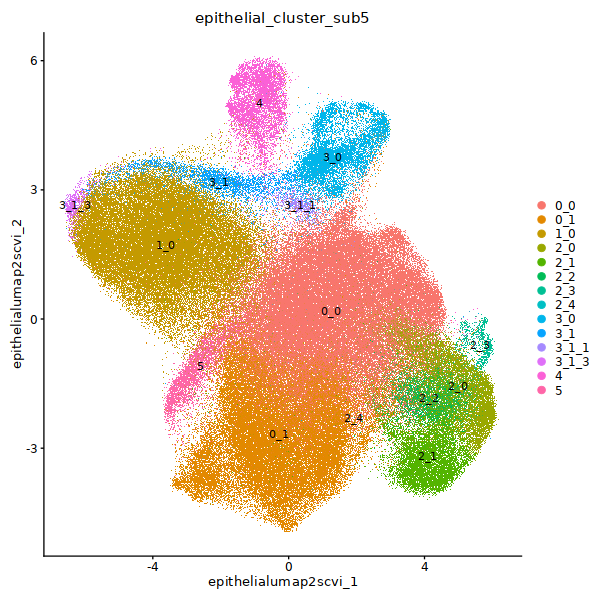

In [169]:
Idents(epithelial_clean3) = "epithelial_cluster_sub4"
epithelial_clean3 = FindSubCluster(object = epithelial_clean3,
                                   cluster = '2',
                                   graph.name = 'RNA_snn',
                                   subcluster.name = "epithelial_cluster_sub5",
                                   resolution = 0.2,
                                   algorithm = 1
                                  )
unique(epithelial_clean3$epithelial_cluster_sub5)

set_size(6,6)
DimPlot(epithelial_clean3, reduction = 'epithelial_umap2.scvi', group.by = 'epithelial_cluster_sub5', label = TRUE)

In [170]:
table(epithelial_clean3$epithelial_cluster_sub5)


  0_0   0_1   1_0   2_0   2_1   2_2   2_3   2_4   3_0   3_1 3_1_1 3_1_3     4 
73797 48690 50463 10687 10073  3958  1001     2  9199  3590   936   849  7544 
    5 
 4914 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1001
Number of edges: 26552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9332
Number of communities: 3
Elapsed time: 0 seconds


[1] "0_0"   "1_0"   "0_1"   "5"     "3_0"   "2_0"   "2_1"   "3_1"   "3_1_3"
[10] "2_2"   "2_3_0" "4"     "2_3_1" "3_1_1" "2_3_2"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



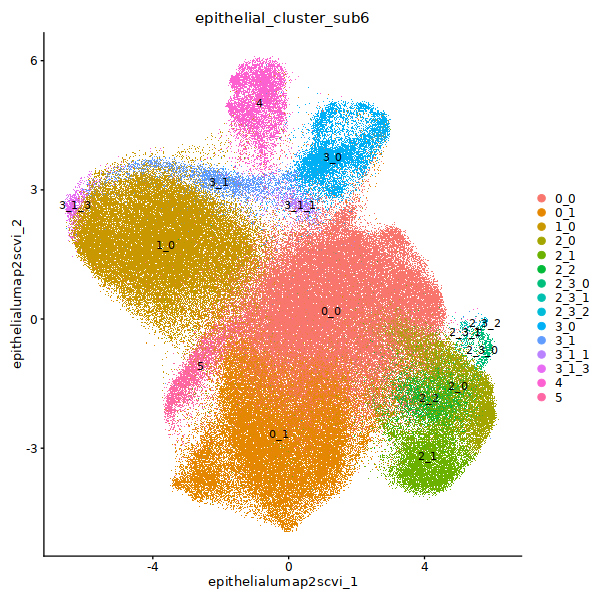

In [173]:
epithelial_clean3 <- epithelial_clean3 %>% subset(epithelial_cluster_sub5 != '2_4')

Idents(epithelial_clean3) = "epithelial_cluster_sub5"
epithelial_clean3 = FindSubCluster(object = epithelial_clean3,
                                   cluster = '2_3',
                                   graph.name = 'RNA_snn',
                                   subcluster.name = "epithelial_cluster_sub6",
                                   resolution = 0.1,
                                   algorithm = 1
                                  )
unique(epithelial_clean3$epithelial_cluster_sub6)

set_size(6,6)
DimPlot(epithelial_clean3, reduction = 'epithelial_umap2.scvi', group.by = 'epithelial_cluster_sub6', label = TRUE)

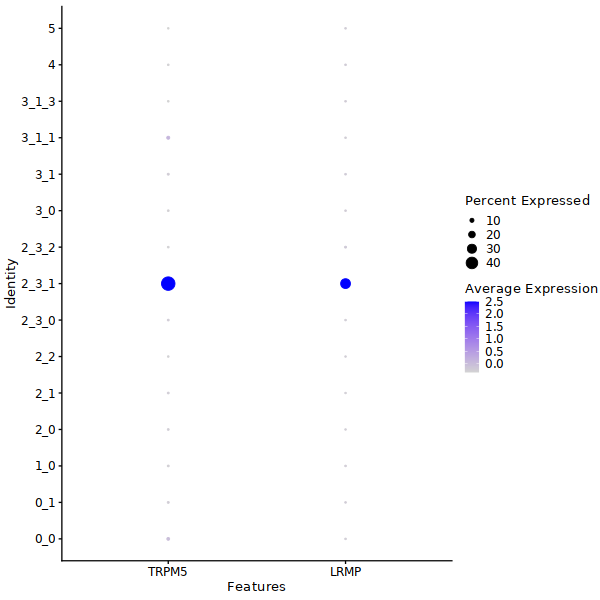

In [180]:
DotPlot(epithelial_clean3, feature = c('TRPM5', 'LRMP'), group.by = 'epithelial_cluster_sub6')

In [181]:
epithelial_clean3@meta.data <- epithelial_clean3@meta.data %>% 
                               mutate(epithelial_cluster_sub6 = case_when(epithelial_cluster_sub6 == '2_2' ~ '2_0',
                                                                          epithelial_cluster_sub6 == '2_1' ~ '2_0',
                                                                          epithelial_cluster_sub6 == '2_3_2' ~ '2_3',
                                                                          epithelial_cluster_sub6 == '2_3_0' ~ '2_3',
                                                                          TRUE ~ epithelial_cluster_sub6))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



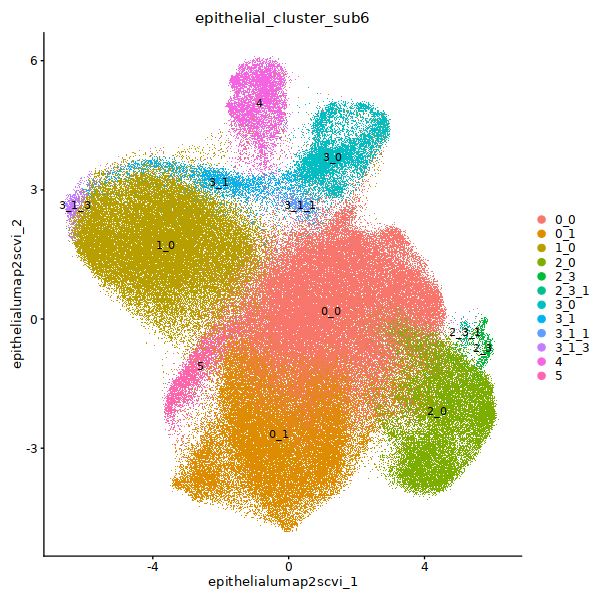

In [182]:
set_size(6,6)
DimPlot(epithelial_clean3, reduction = 'epithelial_umap2.scvi', group.by = 'epithelial_cluster_sub6', label = TRUE)

#### clean meta.data

In [185]:
colnames(epithelial_clean3@meta.data)

[1] "orig.ident"              "Patient_ID"             
 [3] "nCount_RNA"              "nFeature_RNA"           
 [5] "percent.mito"            "nCount_SCT"             
 [7] "nFeature_SCT"            "seurat_clusters"        
 [9] "S.Score"                 "G2M.Score"              
[11] "Phase"                   "SCT_snn_res.2"          
[13] "cell_type_RNA"           "cell_type_RNA_simple"   
[15] "Age"                     "Sex"                    
[17] "Site_of_Origin"          "Tissue_Type"            
[19] "Primary_Side"            "MSI"                    
[21] "MSI_score"               "Tx_in_6mo"              
[23] "scrublet_doublet"        "DF_doublet"             
[25] "cell_type_integrated"    "cell_type_simple"       
[27] "cell_type_integrated2"   "cell_type_simple2"      
[29] "mCRCv6_clusters_0.2"     "mCRCv6_clusters_0.4"    
[31] "mCRCv6_clusters_0.6"     "mCRCv6_clusters_0.8"    
[33] "mCRCv6_clusters_1"       "mCRCv6_clusters_1.2"    
[35] "mCRCv6_clusters_1.4"     "mCRCv6_clusters_1.6"    
[37] "mCRCv6_clusters_1.8"     "mCRCv6_clusters_2"      
[39] "cell_type_simple3"       "cell_type_integrated3"  
[41] "epithelial_clusters_0.1" "APC_mutation"           
[43] "KRAS_mutation"           "TP53_mutation"          
[45] "APC_mut"                 "KRAS_mut"               
[47] "TP53_mut"                "epithelial_cluster_sub6"

In [186]:
# epithelial_clean3$mCRCv5_clusters_2 <- NULL
# epithelial_clean3$tumor_cluster <- NULL
# epithelial_clean3$epithelial_cluster <- NULL
# epithelial_clean3$epithelial_cluster_gsub <- NULL
# epithelial_clean3$epithelial_cluster_esub <- NULL
# epithelial_clean3$epithelial_cluster_egsub <- NULL
# epithelial_clean3$epithelial_cluster_egsub2 <- NULL
# epithelial_clean3$epithelial_cluster_egsub3 <- NULL
# epithelial_clean3$epithelial_clusters_0.2 <- NULL
# epithelial_clean3$epithelial_clusters_0.4 <- NULL
# epithelial_clean3$epithelial_clusters_0.5 <- NULL
# epithelial_clean3$epithelial_clusters_0.6 <- NULL
# epithelial_clean3$epithelial_clusters_0.8 <- NULL
# epithelial_clean3$epithelial_clusters_1 <- NULL
# epithelial_clean3$epithelial_clusters_1.2 <- NULL
# epithelial_clean3$epithelial_clusters_1.4 <- NULL
# epithelial_clean3$epithelial_clusters_1.6 <- NULL
# epithelial_clean3$epithelial_clusters_1.8 <- NULL
# epithelial_clean3$epithelial_clusters_2 <- NULL
# epithelial_clean3$mCRCv6_clusters_2_sub65_16 <- NULL
# epithelial_clean3$mCRCv6_clusters_2_sub65_16_34 <- NULL
# epithelial_clean3$tumor_in_normal <- NULL
# epithelial_clean3$epithelial_cluster_sub1 <- NULL
# epithelial_clean3$epithelial_cluster_sub2 <- NULL
# epithelial_clean3$epithelial_cluster_sub3 <- NULL
# epithelial_clean3$epithelial_cluster_sub4 <- NULL
# epithelial_clean3$epithelial_cluster_sub5 <- NULL

In [187]:
saveRDS(epithelial_clean3, '57_Integrated_normalized_mCRC_snRNA_noDB_v7_epithelial_clean3.rds')

In [192]:
Idents(epithelial_clean3) = "epithelial_cluster_sub6"
epithelial_clean3_markers = FindAllMarkers(epithelial_clean3,
                                           min.pct=0.1, 
                                           logfc.threshold=0.5, 
                                           only.pos = TRUE, 
                                           return.thresh = 0.01,
                                           test.use = 'MAST')
write.csv(epithelial_clean3_markers,  "mCRC_epithelial_clean3_markers_mast_deg.csv", row.names = TRUE)

Calculating cluster 0_0

Warning message in new_with_repaired_slots(classname = method, design = colData(sca), :
“Dropping illegal slot(s) norm.method for class BayesGLMlike.  
                    This likely indicates a bug in an upstream package.”

 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>--------------